# **🔥 Heatmap Analysis**

In this notebook, we generate heatmaps that can be shown on an interactive map.

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pandas as pd
import numpy as np
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
import sys
import os

path_to_preprocessing = os.path.join('..', '..', 'src')
sys.path.insert(0, path_to_preprocessing)

from analysis.heatmap import Heatmap

In [18]:
STOPS_PATH = '../../data/processed/stops.csv'

bav = pd.read_csv(STOPS_PATH)
bav.drop(columns=[
    "x_fa2", 
    "y_fa2",
    "indegree",
    "outdegree",
    "degree",
    "betweenness_centrality",
], inplace=True)
bav.rename(columns={
    "x_geo": "x",
    "y_geo": "y",
}, inplace=True)
bav.head()

,stop_id,stop_name,stop_lon,stop_lat,transport_type,city,canton,is_bus_stop,is_tram_stop,is_train_stop,is_metro_stop,is_rack_railway_stop,is_boat_stop,x,y
0,8500010,Basel SBB,2611363.0,1266310.0,Train,Basel,BS,False,False,True,False,False,False,8747.787053,1083.724166
1,8500016,Basel St. Johann,2610076.0,1268853.0,Train,Basel,BS,False,False,True,False,False,False,8740.453774,1098.214087
2,8500020,Muttenz,2615758.0,1264783.0,Train,Muttenz,BL,False,False,True,False,False,False,8772.829603,1075.023376
3,8500021,Pratteln,2618994.0,1263578.0,Train,Pratteln,BL,False,False,True,False,False,False,8791.268213,1068.157330
4,8500023,Liestal,2622064.0,1259341.0,Train,Liestal,BL,False,False,True,False,False,False,8808.760961,1044.015059


In [19]:
heatmap = Heatmap(
    bav, 
    resolution=2000, 
    left_margin=20, 
    right_margin=50,
    top_margin=10,
    bottom_margin=0
    )

## **👀 Take a Look at the Data**

In [20]:
heatmap.show_map()

## **🛑 Density Heatmap**

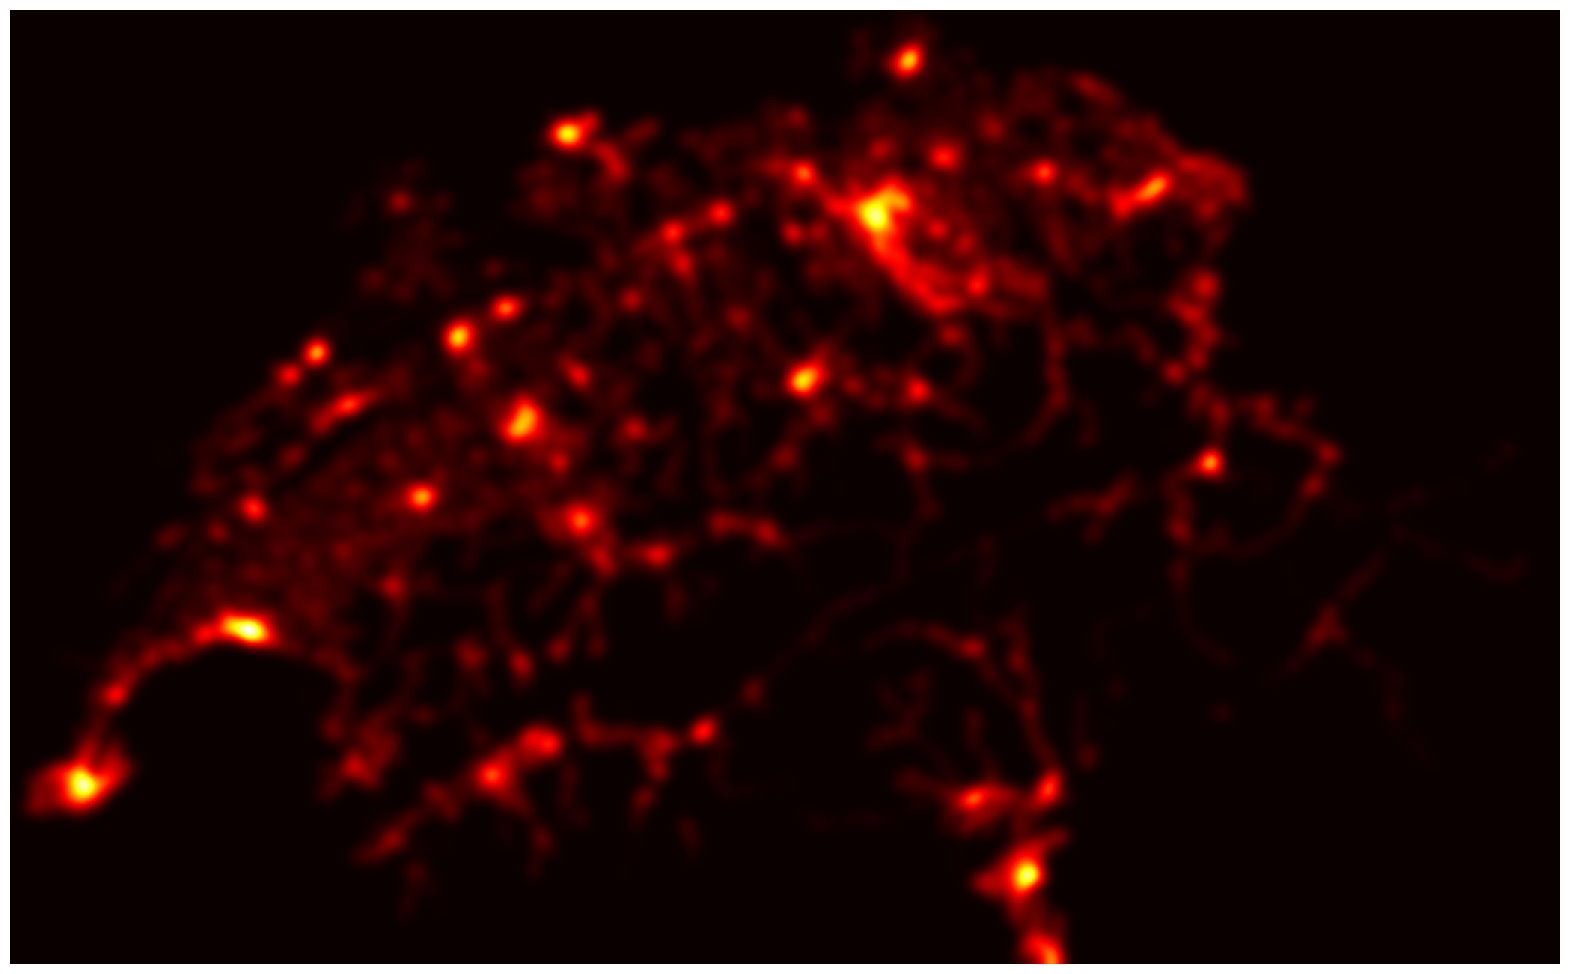

In [21]:
heatmap.show_density_heatmap(radius=10)

In [22]:
DENSITY_HEATMAP_DST_PATH = '../../generated/density_heatmap.png'
IMG_RATIO = 1.564

density_heatmap = heatmap.get_density_heatmap(radius=10)
density_heatmap = np.rot90(density_heatmap)

# Get the current height and width of the density heatmap
height, width = density_heatmap.shape

# Calculate the new width based on the desired aspect ratio
new_width = int(height * IMG_RATIO)

# Calculate the zoom factors for height and width
zoom_factor_height = 1  # Keep the height unchanged
zoom_factor_width = new_width / width

# Resize the image
resized_density_heatmap = zoom(density_heatmap, (zoom_factor_height, zoom_factor_width), order=1)

# Save the resized image
plt.imsave(
    DENSITY_HEATMAP_DST_PATH,
    resized_density_heatmap,
    cmap='gray'
)

### **🚍 Density Heatmap by Transport Type**

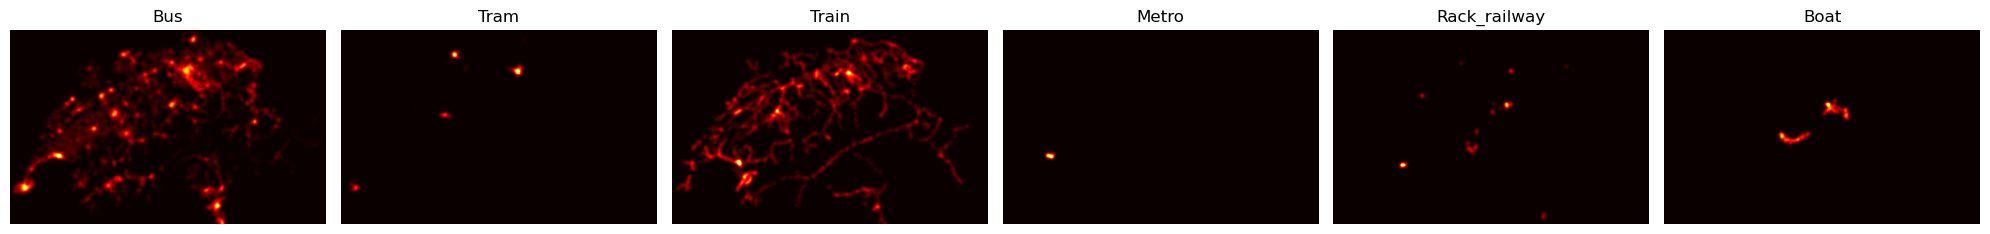

In [10]:
heatmap.show_density_heatmap_for_all_transport_types(radius=10)

In [23]:
DENSITY_HEATMAP_DST_PATH = '../../generated/density_heatmap_{transport_type}.png'

transport_types = ['bus', 'tram', 'train', 'metro', 'rack_railway', 'boat']
for i, transport_type in enumerate(transport_types):
    density_heatmap = heatmap.get_density_heatmap_for_transport_type(transport_type, radius=10)
    density_heatmap = np.rot90(density_heatmap)
    
    # Get the current height and width of the density heatmap
    height, width = density_heatmap.shape

    # Calculate the new width based on the desired aspect ratio
    new_width = int(height * IMG_RATIO)

    # Calculate the zoom factors for height and width
    zoom_factor_height = 1  # Keep the height unchanged
    zoom_factor_width = new_width / width

    # Resize the image
    resized_density_heatmap = zoom(density_heatmap, (zoom_factor_height, zoom_factor_width), order=1)
    
    plt.imsave(
        DENSITY_HEATMAP_DST_PATH.format(transport_type=transport_type), 
        resized_density_heatmap, 
        cmap='gray'
    )